# Homework 2

## Oliver Muellerklein working with Zhongqi Miao and Jacob Bukoski 


### Question 0: Information from Figures 

Here is an example figure from computational population ecology.

![Example Figure](hw_2_data/exampleFig.png)

The figure is illustrating the way to conceptualize (from visualizing) multi-dimensional data in various subsapces. This figure is showing the extraction and relationship of data points and multi-dimensional probability. In particular, this technique is describing the math / statistics behind home range and population density estimation methods (e.g. Kernel Density Estimation). In all, this figure does a great job of conveying the many ways to interpret and digest this complex data in a clear and concise fashion. However, there would be tremedous learning opportunities gained from interactivity - e.g. through web-based protocols. The full relationship of area to density (and fraction of density) would be much clearer in an interactive setting. This is particularly of interest in population ecology when movement and spatial scales go hand-in-hand with geographic data. Home range and population density (where this figure was drawn from) of animals occurs in complex, non-linear ways that are often counter-intuitive. Visualizations can provide key insights into ecological behavior by allowing a multi-view approach to noise and signal.    

### Question 1: Reproduced Figure with Bokeh 

Here I recreate a figure with dynamic interactive capabilities through *Bokeh*. Note: my group and I (Miao and Jacob) worked together to figure out how to use Bokeh and reproduce some plots. As such, we ended up with very similar code.  


In [41]:
%matplotlib inline

import numpy as np
import scipy as sp

from bokeh.io import output_file, show
from bokeh.models.layouts import Row
from bokeh.plotting import figure
from bokeh.models import Range1d, Label, Arrow, NormalHead

class GetBokData(object):
    
    def __init__(self):
        self.effD = None
        self.purD = None
        
        self.effType = { 
            'names': ('frac_followed', 'frac_observed', 'frac_observed_uncertainty'), 
            'formats': ('f','f','f')
        }
        self.purType = {
            'names': ('frac_followed', 'frac_observed', 'frac_observed_uncertainty'), 
            'formats': ('f','f','f')
        }
        self.loadData(skipp = 2)
        
    def loadData(self, skipp = 1):
        """
        Load sample data from efficiency and purity
        """
        try:
            self.effD = np.loadtxt("hw_2_data/Efficiency.txt", dtype = self.effType, skiprows = skipp)
            self.purD = np.loadtxt("hw_2_data/Purity.txt", dtype = self.purType, skiprows = skipp)
        except IOError as e:
            """
            Catch I/O error 
            """
            errCode, errShow = e.args
            print("I/O exception raised with error number: ", errCode)
            print("I/O exception error: ", errShow)
        except:
            """
            Catch generic error
            """
            print("Error: ", sys.exc_info()[0])
            raise
        
    def getData(self):
        return self.effD, self.purD 

class PlotBok(object):
    
    def __init__(self, eff, pur):
        self.eff = eff
        self.pur = pur
        self.label1 = None
        self.label2 = None
        self.label3 = None
        self.label4 = None
        self.label5 = None
        self.label6 = None
        self.label7 = None
        self.label8 = None
        self.label9 = None
        self.label10 = None
        
        self.effUncertainX = []
        self.effUncertainY = []
        self.purUncertainX = []
        self.purUncertainY = []
        
        # Bokeh tools 
        self.TOOLS = "hover,pan,wheel_zoom,box_zoom,undo,redo,reset,tap,save"
        
        self.setLabels()
    
    def setLabels(self):
        self.label1 = Label(text='Random', x = 0.75, y = 0.55)
        self.label2 = Label(text='guessing', x = 0.75, y = 0.5)
        self.label3 = Label(text='Follow up 20% of', x = 0.42, y = 0.28)
        self.label4 = Label(text='bursts to capture ~55%', x = 0.42, y = 0.23)
        self.label5 = Label(text='of high-z events', x = 0.42, y = 0.18)
        self.label6 = Label(text='If 20% of events are', x = 0.01, y = 0.9)
        self.label7 = Label(text='followed up, ~40% of', x = 0.01, y = 0.85)
        self.label8 = Label(text='them will be high-z', x = 0.01, y = 0.80)
        self.label9 = Label(text='Random', x = 0.67, y = 0.52)
        self.label10 = Label(text='guessing', x = 0.67, y = 0.47)
        
    def setUncertain(self):
        self.effLow = self.eff['frac_observed'] - self.eff['frac_observed_uncertainty']
        self.effHi = self.eff['frac_observed'] + self.eff['frac_observed_uncertainty']
        self.effUncertainX = np.append(self.eff['frac_followed'], self.eff['frac_followed'][::-1])
        self.effUncertainY = np.append(self.effLow, self.effHi[::-1])

        self.purLow = self.pur['frac_observed'] - self.pur['frac_observed_uncertainty']
        self.purHi = self.pur['frac_observed'] + self.pur['frac_observed_uncertainty']
        self.purUncertainX = np.append(self.pur['frac_followed'], self.pur['frac_followed'][::-1])
        self.purUncertainX = np.append(self.purLow, self.purHi[::-1])
        
    def buildPanels(self):
        pLeft = figure(width = 500, plot_height = 500, title = 'Efficiency', tools = self.TOOLS)
        pLeft.line(self.eff['frac_followed'], self.eff['frac_observed'], color = 'black')
        pLeft.line(self.eff['frac_followed'], self.eff['frac_followed'], color = 'black')
        pLeft.line([0.2,0.2],[-0.08, 0.55], color = 'black', line_dash = 'dotted')
        pLeft.grid.grid_line_color = None
        pLeft.xaxis.axis_label = "Fraction of GRBs Followed Up"
        pLeft.yaxis.axis_label = "Fraction of high (z > 4) GRBs observed"
        pLeft.axis.axis_label_text_font_style = "normal"
        pLeft.set(x_range = Range1d(-0.04, 1.04), y_range = Range1d(-0.04, 1.04))
        pLeft.patch(self.effUncertainX, self.effUncertainY, fill_alpha = 0.3, color = '#D3D3D3')

        pLeft.add_layout(self.label1)
        pLeft.add_layout(self.label2)
        pLeft.add_layout(self.label3)
        pLeft.add_layout(self.label4)
        pLeft.add_layout(self.label5)
        pLeft.add_layout(Arrow(end = NormalHead(fill_color = "black", line_width = 4, size = 5),
                            x_start = 0.82, y_start = 0.6, x_end = 0.82, y_end = 0.78))
        pLeft.add_layout(Arrow(end = NormalHead(fill_color ="black", line_width = 4, size = 5),
                            x_start = 0.4, y_start = 0.3, x_end = 0.21, y_end = 0.54))

        pRight = figure(width = 500, plot_height = 500, title = 'Purity', tools = self.TOOLS)
        pRight.line(self.pur['frac_followed'], self.pur['frac_observed'], color = 'black')
        pRight.line(self.pur['frac_followed'], (18.0/135.0), color = 'black')
        pRight.line([0.2, 0.2], [-0.08, 0.39], color = 'black', line_dash = 'dotted')
        pRight.grid.grid_line_color = None
        pRight.xaxis.axis_label = "Fraction of GRBs Followed Up"
        pRight.yaxis.axis_label = "Percent of observed GRBs that are high z (z > 4)"
        pRight.axis.axis_label_text_font_style = "normal"
        pRight.set(x_range = Range1d(-0.04, 1.04), y_range = Range1d(-0.04, 1.04))
        pRight.patch(self.purUncertainX, self.purUncertainY, fill_alpha = 0.3, color = '#D3D3D3')

        pRight.add_layout(self.label6)
        pRight.add_layout(self.label7)
        pRight.add_layout(self.label8)
        pRight.add_layout(self.label9)
        pRight.add_layout(self.label10)
        pRight.add_layout(Arrow(end = NormalHead(fill_color = "black", line_width = 4, size = 5),
                            x_start = 0.2, y_start = 0.75, x_end = 0.2, y_end = 0.4))
        pRight.add_layout(Arrow(end = NormalHead(fill_color ="black", line_width = 4, size = 5),
                            x_start = 0.75, y_start = 0.45, x_end = 0.6, y_end = (20.0 / 135.0)))
        
        allPanels = Row(pLeft, pRight)
        show(allPanels)

        
    

# Generate structure for data 
sampleData = GetBokData()
# Get data 
effD, purD = sampleData.getData()


In [42]:
sampleFigs = PlotBok(effD, purD)

In [43]:
sampleFigs.setUncertain()

In [40]:
sampleFigs.buildPanels()

### Question 2: Reproduce Stocks

Here I recreate the *stocks.png* figure using *matplotlib*. 


In [23]:
import sys 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from bokeh import mpl

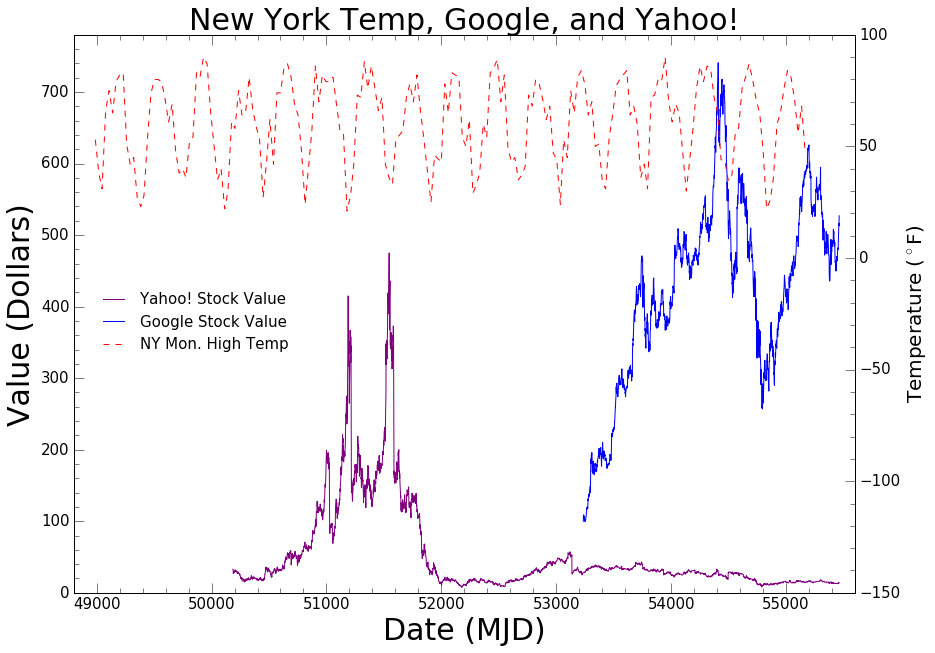

In [25]:
%matplotlib inline

class GetStockData(object):
    
    def __init__(self):
        #self.data = load_iris()
        self.NY = None
        self.YA = None
        self.GO = None
        
        self.nyType = { 
            'names': ('Modified Julian Date', 'Max Temperature'), 
            'formats': ('<i4', '<i4') 
        }
        self.yaType = {
            'names' : ('Modified Julian Date', 'Stock Value'), 
            'formats' : ('<i4', '<i4')
        }
        self.goType = {
            'names' : ('Modified Julian Date', 'Stock Value'), 
            'formats' : ('<i4', '<i4')
        }
        
        self.loadData()
        
    def loadData(self, deli = '\t', skipp = 1):
        """
        Load stock data from types 
        """
        try:
            self.NY = np.loadtxt("hw_2_data/ny_temps.txt", delimiter = deli, dtype = self.nyType, skiprows = skipp)
            self.YA = np.loadtxt("hw_2_data/yahoo_data.txt", delimiter = deli, dtype = self.yaType, skiprows = skipp)
            self.GO = np.loadtxt("hw_2_data/google_data.txt", delimiter = deli, dtype = self.goType, skiprows = skipp)    
        except IOError as e:
            """
            Catch I/O error 
            """
            errCode, errShow = e.args
            print("I/O exception raised with error number: ", errCode)
            print("I/O exception error: ", errShow)
        except:
            """
            Catch generic error
            """
            print("Error: ", sys.exc_info()[0])
            raise
        
    def getData(self):
        return self.NY, self.YA, self.GO 

class GetStockFigs(object):
    
    def __init__(self, nyData, yaData, goData):
        self.nyD = nyData
        self.yaD = yaData
        self.goD = goData
        self.titleFont = None
        self.fig, self.ax = plt.subplots(figsize = (14, 10))
        
        self.ny = None
        self.ya = None
        self.go = None
        
    def setFormatFig(self):
        self.titleFont = {'fontname':'Serif', 'fontweight': 'bold'}
        
    def plotData(self, fontt = 30):
        self.ya, = self.ax.plot(self.yaD["Modified Julian Date"], self.yaD["Stock Value"], color = 'purple')
        self.go, = self.ax.plot(self.goD["Modified Julian Date"], self.goD["Stock Value"], color = 'b')
        self.ax.set_title("New York Temp, Google, and Yahoo!", fontsize = fontt, fontdict = self.titleFont)
        self.ax.set_xlabel("Date (MJD)", fontsize = fontt)
        self.ax.set_ylabel("Value (Dollars)", fontsize = fontt)
        self.ax.set_xlim([48800, 55600])
        self.ax.set_ylim([0, 780])
        self.ax.tick_params(axis = 'both', which = 'major', length = 10, labelsize = 15)
        self.ax.tick_params(axis = 'both', which = 'minor', length = 5)
        self.ax.minorticks_on()
        
        # Subplot2 overlaid on subplot1
        self.ax1 = self.ax.twinx()
        ny, = self.ax1.plot(ny_temps["Modified Julian Date"], ny_temps["Max Temperature"], 'r--')
        self.ax1.set_ylabel("Temperature ($^\circ$F)", fontsize = 20)
        self.ax1.set_ylim([-150, 100])
        self.ax1.set_xlim([48800, 55600])
        self.ax1.tick_params(which = 'major', length = 10, labelsize = 15)
        self.ax1.tick_params(which = 'minor', length = 5)
        self.ax1.minorticks_on()

        self.fig.legend(handles = [ya, go, ny], labels = ['Yahoo! Stock Value', 'Google Stock Value', 'NY Mon. High Temp'], 
                        bbox_to_anchor = (0.3, 0.52), prop = {'size' : 15}, frameon = False)

        
# Generate structure for data 
stockData = GetStockData()
# Get data 
nyD, yaD, goD = stockData.getData()
# Show figure 
stockFig = GetStockFigs(nyD, yaD, goD)
stockFig.plotData()



### Question 3: Generic Brushing

Note: Could not figure out how to implement correctly - thus, this is an incomplete class to generate generic brushing events with the iris dataset (via *scikit-learn*). I successfully implemented single data point interactions throughout the subplots. However, the *GlueData* class below was the final attempt with the inclusion of rectangle patch selection (again, this is not fully working but the logic is all written out). 


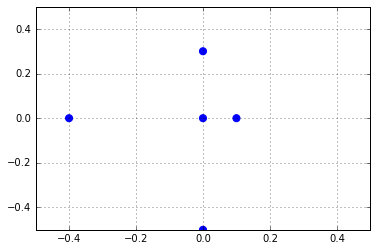

In [30]:
# This is an example of interactive plotting + callback for pick event 
# -> taken from web for reference 

%matplotlib inline

import sys
import numpy as np
import matplotlib.pyplot as plt

testData = np.array([[0,0], [0.1, 0], [0, 0.3], [-0.4, 0], [0, -0.5]])
fig, ax = plt.subplots()
coll = ax.scatter(testData[:,0], testData[:,1], color=["blue"]*len(testData), picker = 5, s=[50]*len(testData))
plt.grid(True)
plt.axis([-0.5, 0.5, -0.5, 0.5])

def on_pick(event):
    print("testData[event.ind], 'clicked'")
    #coll._facecolors[event.ind, :] = (1, 0, 0, 1)
    #coll._edgecolors[event.ind, :] = (0, 0, 0, 0)
    coll._facecolors[event.ind, :] = (0.7, 0.7, 0.7, 0.7)
    coll._edgecolors[event.ind, :] = (0, 0, 0, 0)
    fig.canvas.draw()

fig.canvas.mpl_connect('pick_event', on_pick)
plt.show()

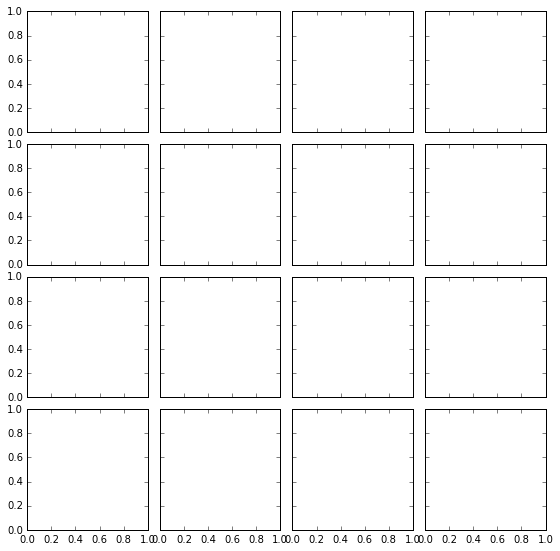

In [6]:

%matplotlib inline

import sys
import numpy as np

import matplotlib.patches as pat
from matplotlib.path import Path
import matplotlib.pyplot as plt
import ipywidgets as widgets
from sklearn.datasets import load_iris

class GlueData(object):
    
    #def __init__(self, data):
    def __init__(self, data, axes, fig, yTarget):
        
        self.ax0 = plt.gca()
        self.ax = axes
        self.fig = fig
        #self.ax = plt.gca()
        #self.fig = self.ax.figure
        #self.canvas = self.fig.canvas
        self.X = data
        self.pickInd = []
        self.points = None
        self.pointColors = yTarget
        self.grayPoints = False
        self.checkPoints = False
        self.verts = None
        self.vPath = None
        self.indd = None
        
        self.rect = None
        self.x0 = None
        self.y0 = None
        self.x1 = None
        self.y1 = None
        self.checkPress = False
        self.checkRect = False
        self.ax0.figure.canvas.mpl_connect('axes_enter_event', self.enterAxes)
        self.ax0.figure.canvas.mpl_connect('axes_leave_event', self.leaveAxes)
        #self.canvas.mpl_connect('axes_enter_event', self.enterAxes)
        #self.canvas.mpl_connect('axes_leave_event', self.leaveAxes)
        
        #if (self.checkPoints == True):
        #    self.update() 
        
    def onPress(self, event):
        self.x0 = event.xdata
        self.y0 = event.ydata
        self.checkPress = True
        
    def onMotion(self, event):
        if self.checkPress:
            self.x1 = event.xdata
            self.y1 = event.ydata
            self.rect.set_width(self.x1 - self.x0)
            self.rect.set_height(self.y1 - self.y0)
            self.rect.set_xy((self.x0, self.y0))
            self.rect.set_fill(True)
            self.rect.set_alpha(0.1)
            self.ax0.figure.canvas.draw()
        else:
            return
        
    def onRelease(self, event):
        self.x1 = event.xdata
        self.y1 = event.ydata
        self.rect.set_width(self.x1 - self.x0)
        self.rect.set_height(self.y1 - self.y0)
        self.rect.set_xy((self.x0, self.y0))
        self.rect.set_fill(False)
        self.rect.set_alpha(1)
        self.ax0.figure.canvas.draw()
        self.checkPress = False
        
        self.verts = [(self.x0, self.y0), (self.x0, self.y1), (self.x1, self.y0), (self.x1, self.y1)]
        
        
    def colorChangeCB(self, event):
        """
        Callback for color change of points in canvas.
        """
        self.pickInd.append(event.ind)
        self.points._facecolors[event.ind, :] = (0.7, 0.7, 0.7, 0.7)
        self.points._edgecolors[event.ind, :] = (0.7, 0.7, 0.7, 0.7)
        self.checkPoints = True 
        self.grayPoints = True
        #self.update()
        
    def colorChange(self):
        """
        Non-callback for color change of points in canvas.
        """
        
        if self.verts == None:
            return
        self.vPath = Path(self.verts)
        self.indd = self.vPath.contains_points(self.points.get_offsets())
        self.pickInd.append(self.indd)
        self.points._facecolors[self.indd, :] = (0.7, 0.7, 0.7, 0.7)
        #self.points._edgecolors[self.indd, :] = (0.7, 0.7, 0.7, 0.7)
        
    def disconnect(self):
        self.ax0.figure.canvas.mpl_disconnect(self.id1)
        self.ax0.figure.canvas.mpl_disconnect(self.id2)
        self.ax0.figure.canvas.mpl_disconnect(self.id3)
        #self.ax0.figure.canvas.mpl_disconnect(self.id4)
        
    def enterAxes(self, event):

        self.rect = pat.Rectangle((0,0), 0, 0)
        event.inaxes.add_patch(self.rect)

        self.id1 = event.inaxes.figure.canvas.mpl_connect('button_press_event', self.onPress)
        self.id2 = event.inaxes.figure.canvas.mpl_connect('button_release_event', self.onRelease)
        self.id3 = event.inaxes.figure.canvas.mpl_connect('motion_notify_event', self.onMotion)
        #self.id4 = event.inaxes.figure.canvas.mpl_connect('pick_event', self.colorChange)

        event.inaxes.patch.set_facecolor('yellow')
        event.canvas.draw()
        
    def leaveAxes(self, event):
        self.rect.set_width(0)
        self.rect.set_height(0)
        self.rect.set_xy((0, 0))

        self.disconnect()
        event.inaxes.patch.set_facecolor('white')
        event.canvas.draw()
        
    def setPoints(self):
        for i in range(4):
            for j in range(4):
                self.points = self.ax[3 - i, j].scatter(self.X[:, j], self.X[:, i], c = self.pointColors, s = 40, alpha = 0.5, picker = 5)
    
    def update(self):
        self.colorChange()
        #self.pointColors = self.points._facecolors
        for i in range(4):
            for j in range(4):
                self.points = self.ax[3 - i, j].scatter(self.X[:, j], self.X[:, i], c = self.pointColors, s = 40, alpha = 0.5, picker = 5)
    
        #self.canvas.draw()
        
    def getPointFaces(self):
        return self.points._facecolors
    
    #def getPointEdges(self):
    #    return self.points._edgecolors
    
    def getInd(self):
        return self.pickInd

class IrisExample(object):
    
    def __init__(self):
        self.data = load_iris()
        self.X = self.data.data
        self.y = self.data.target
        self.mask = None
        
    def ditherX(self):
        self.X += 0.1 * np.random.random(self.X.shape)

    def setMaskList(self):
        self.mask = np.zeros(shape = (X.shape[0], 1))
        
    def getX(self):
        return self.X  
    
    def getY(self):
        return self.y

irisSample = IrisExample()
irisSample.ditherX()
irisX = irisSample.getX()
irisY = irisSample.getY()

fig, ax0 = plt.subplots(4, 4, sharex="col", sharey="row", figsize=(8, 8))
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95,
                    hspace=0.1, wspace=0.1)

glueFigs = GlueData(irisX, ax0, fig, irisY)
#glueFigs.setPoints()
#glueFigs.update()

In [7]:
# Here we take the class instance and plot points 
glueFigs.setPoints()

# Pick event should initiate update() 
# ...however, found that due to weak references 
# in callbacks within encapsulated matplotlib connections
# the scope / references to class (and event-to-data-in-figures workflow)
# was lost. Thus, must manually call update() after clicking 
# to redraw canvas with selected points. 
#glueFigs.update()

In [5]:
# See verticies of rect over points 
#glueFigs.verts

In [4]:
# Path of vertices (rect)
#glueFigs.vPath

In [3]:
# Indices of picked artists on canvas
#glueFigs.pickInd